# Algorithms Exercise 1

## Imports

In [312]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Word counting

Write a function `tokenize` that takes a string of English text returns a list of words. It should also remove [stop words](http://en.wikipedia.org/wiki/Stop_words), which are common short words that are often removed before natural language processing. Your function should have the following logic:

* Split the string into lines using `splitlines`.
* Split each line into a list of words and merge the lists for each line.
* Use Python's builtin `filter` function to remove all punctuation.
* If `stop_words` is a list, remove all occurences of the words in the list.
* If `stop_words` is a space delimeted string of words, split them and remove them.
* Remove any remaining empty words.
* Make all words lowercase.

In [313]:
def tokenize(s, stop_words=[], punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\t'):
    """Split a string into a list of words, removing punctuation and stop words."""

    #Splitlines up
    lines = s.splitlines()
    
    #make an empty list and counter variable
    empty = []
    i = 0
    #split each line up into lists of words
    while i < len(lines):
        empty.extend(lines[i].split())
        i+=1
    #make an empty list and counter variable
    a = []
    b = 0
    #go through each char and see if it is a punctuation mark
    while b < len(empty):
        a.append(''.join([c for c in empty[b] if c not in punctuation]))
        b+=1
    #make each word lowercase
    h = [g.lower() for g in a]
    
    #make an empty list and counter variable
    c = 0
    e = []
    #go through each word and see if it is a stopword
    while c < len(h):
        e.append(''.join([d for d in h[c] if h[c] not in stop_words]))
        c+=1
    #deletes the empty parts of the list
    answer = list(filter(None,e))
    
    return answer
    

    


In [314]:
assert tokenize("This, is the way; that things will end", stop_words=['the', 'is']) == \
    ['this', 'way', 'that', 'things', 'will', 'end']
wasteland = """
APRIL is the cruellest month, breeding
Lilacs out of the dead land, mixing
Memory and desire, stirring
Dull roots with spring rain.
"""

assert tokenize(wasteland, stop_words='is the of and') == \
    ['april','cruellest','month','breeding','lilacs','out','dead','land',
     'mixing','memory','desire','stirring','dull','roots','with','spring',
     'rain']

Write a function `count_words` that takes a list of words and returns a dictionary where the keys in the dictionary are the unique words in the list and the values are the word counts.

In [363]:
def count_words(data):
    """Return a word count dictionary from the list of words in data."""

    """Creates a dictionary that counts each occurrence of words in data and returns that count"""
    result_dict = dict([(i, data.count(i)) for i in data])
    return result_dict

        
 
    
print (count_words(tokenize('this and the this from and a a a')))

{'from': 1, 'the': 1, 'a': 3, 'and': 2, 'this': 2}


In [356]:
assert count_words(tokenize('this and the this from and a a a')) == \
    {'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

Write a function `sort_word_counts` that return a list of sorted word counts:

* Each element of the list should be a `(word, count)` tuple.
* The list should be sorted by the word counts, with the higest counts coming first.
* To perform this sort, look at using the `sorted` function with a custom `key` and `reverse`
  argument.

In [357]:
def sort_word_counts(wc):
    """Return a list of 2-tuples of (word, count), sorted by count descending."""
    #Sorts the items in descending order
    return sorted(wc.items(), key=lambda data: data[1],reverse = True)



In [358]:
assert sort_word_counts(count_words(tokenize('this and a the this this and a a a'))) == \
    [('a', 4), ('this', 3), ('and', 2), ('the', 1)]

Perform a word count analysis on Chapter 1 of Moby Dick, whose text can be found in the file `mobydick_chapter1.txt`:

* Read the file into a string.
* Tokenize with stop words of `'the of and a to in is it that as'`.
* Perform a word count, the sort and save the result in a variable named `swc`.

In [359]:
data = open ("mobydick_chapter1.txt", "r")
r = data.read()


swc = sort_word_counts(count_words(tokenize(r,stop_words=['the', 'of', 'and', 'a', 'to', 'in', 'is', 'it', 'that', 'as',])))



In [360]:
assert swc[0]==('i',43)
assert len(swc)==848

AssertionError: 

Create a "Cleveland Style" [dotplot](http://en.wikipedia.org/wiki/Dot_plot_%28statistics%29) of the counts of the top 50 words using Matplotlib. If you don't know what a dotplot is, you will have to do some research...

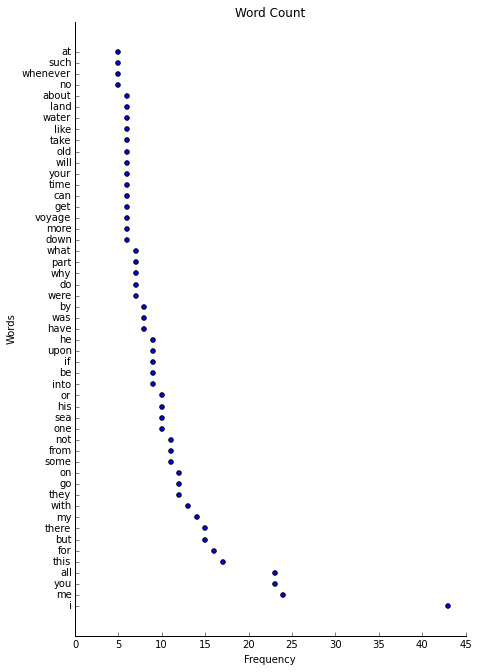

In [364]:
f = plt.figure(figsize = (7,11))
cut = swc[0:51]
cut_1 = [x[1] for x in cut]
ax = plt.gca()
cut_2 = [x[0] for x in cut]
ax.set_yticklabels(cut_2);
plt.yticks(range(0,51))
plt.ylabel('Words')
plt.xlabel('Frequency')
plt.title('Word Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.scatter(cut_1,range(len(cut)));


In [ ]:
assert True # use this for grading the dotplot